In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to SQLite database.db
conn = sqlite3.connect("sale.db")
cursor = conn.cursor()

In [3]:
# Show all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in sale.db:", tables)

Tables in sale.db: [('game_sales',)]


In [4]:
df1 = pd.read_sql_query("""
                        SELECT genre,ROUND(SUM(na_sales),2) as na_sales,
                        ROUND(SUM(eu_sales),2) as eu_sales,
                        ROUND(SUM(jp_sales),2) as jp_sales,
                        ROUND(SUM(other_sales),2) as other_sales,
                        ROUND(SUM(global_sales),2) as global_sales
                        FROM game_sales
                        GROUP BY genre
                        ORDER BY genre;
    """, conn)
df1.style.hide(axis="index")

genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
Action,861.770000,516.480000,158.650000,184.920000,1722.840000
Adventure,101.930000,63.740000,51.990000,16.700000,234.590000
Fighting,220.740000,100.000000,87.150000,36.190000,444.050000
Misc,396.920000,211.770000,106.670000,73.920000,789.870000
Platform,445.990000,200.650000,130.650000,51.510000,829.130000
Puzzle,122.010000,50.520000,56.680000,12.470000,242.210000
Racing,356.930000,236.310000,56.610000,76.680000,726.760000
Role-Playing,326.500000,187.570000,350.290000,59.380000,923.830000
Shooter,575.160000,310.450000,38.180000,101.900000,1026.200000
Simulation,181.780000,113.020000,63.540000,31.360000,389.980000


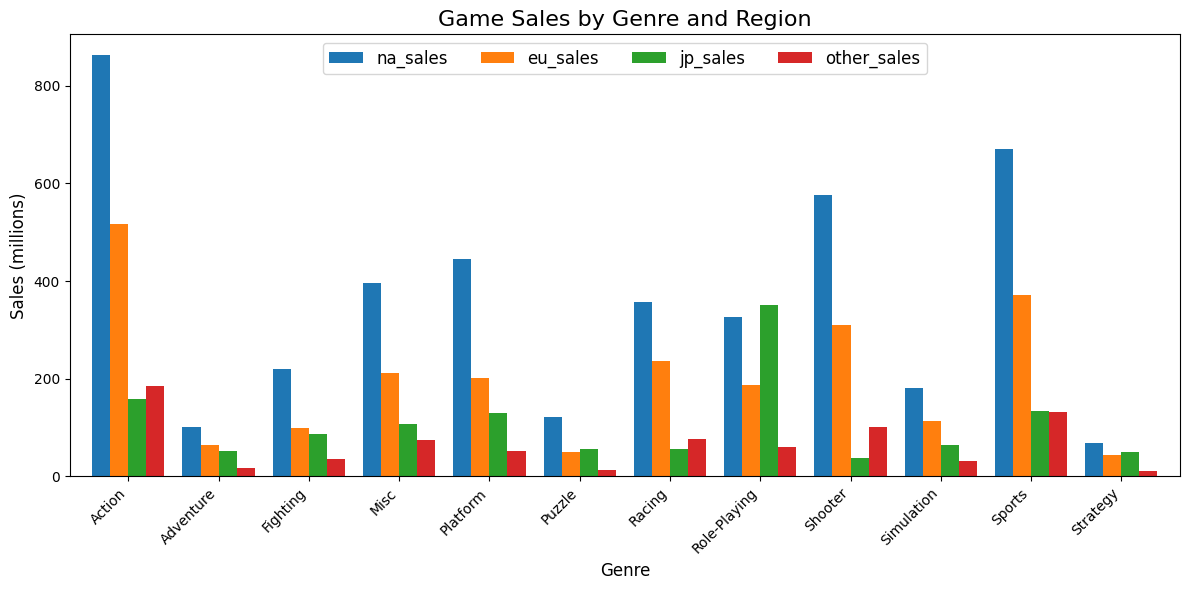

In [5]:
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]

# Plot
ax = df1.plot( x="genre",  y=regions, kind="bar", figsize=(12,6), width=0.8)

plt.title("Game Sales by Genre and Region", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Sales (millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc='upper center', ncol=len(regions),fontsize=12)
plt.tight_layout()
plt.savefig("Game Sales by Genre and Region.png")
plt.show()

In [6]:
df2 = pd.read_sql_query("""
                        SELECT name, global_sales
                        FROM game_sales
                        ORDER BY global_sales DESC
                        LIMIT 5;
    """, conn)
df2.style.hide(axis="index").set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

name,global_sales
Wii Sports,82.740000
Super Mario Bros.,40.240000
Mario Kart Wii,35.820000
Wii Sports Resort,33.000000
Pokemon Red/Pokemon Blue,31.370000


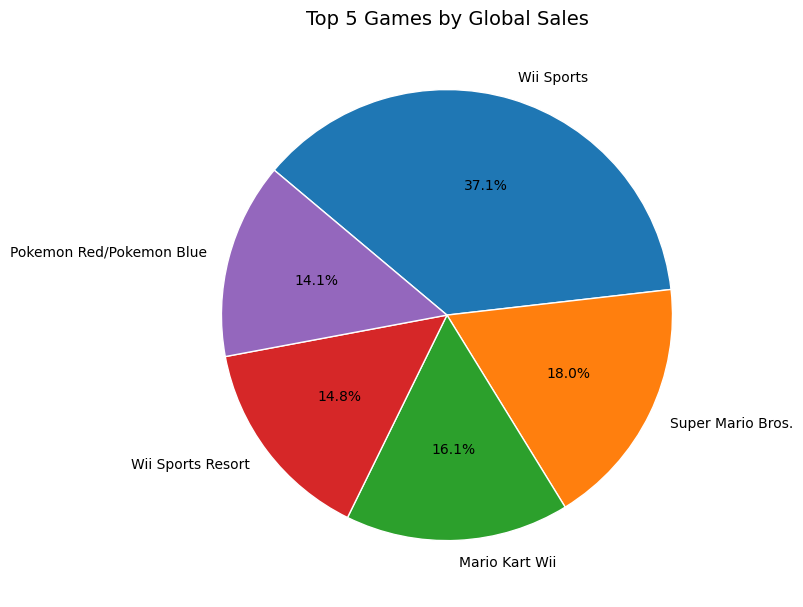

In [7]:
plt.figure(figsize=(8,8))
plt.pie(
    df2["global_sales"],
    labels=df2["name"],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    wedgeprops={"edgecolor":"white"}
)
plt.title("Top 5 Games by Global Sales", fontsize=14)
plt.tight_layout()
plt.savefig("Top 5 Games by Global Sales.png")
plt.show()

In [8]:
df3 = pd.read_sql_query("""
                        SELECT 'na_sales' AS country, ROUND(SUM(na_sales),2) AS sales
                        FROM game_sales
                        UNION ALL
                        SELECT 'eu_sales', ROUND(SUM(eu_sales),2)
                        FROM game_sales
                        UNION ALL
                        SELECT 'jp_sales', ROUND(SUM(jp_sales),2)
                        FROM game_sales
                        UNION ALL
                        SELECT 'other_sales', ROUND(SUM(other_sales),2)
                        FROM game_sales;
    """, conn)
df3.style.hide(axis="index").set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

country,sales
na_sales,4327.650000
eu_sales,2406.690000
jp_sales,1284.270000
other_sales,788.910000


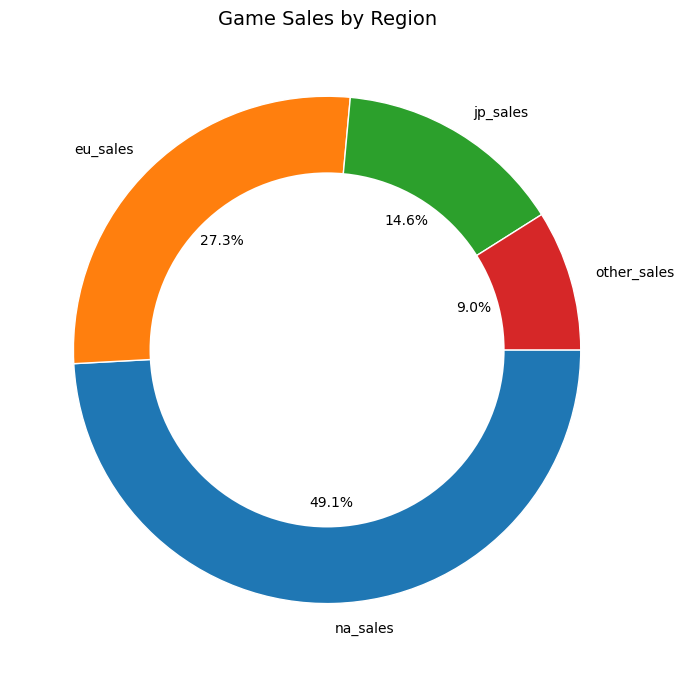

In [9]:
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    df3["sales"],
    autopct='%1.1f%%',
    labels=df3["country"],
    counterclock=False,
    wedgeprops={"edgecolor":"white"}
)

centre_circle = plt.Circle((0,0), 0.7, fc="white")
plt.gca().add_artist(centre_circle)
plt.title("Game Sales by Region", fontsize=14)
plt.tight_layout()
plt.savefig("Game Sales by Region.png")
plt.show()

In [10]:
df4 = pd.read_sql_query("""
                        SELECT name, global_sales
                        FROM game_sales
                        WHERE platform = 'Wii'
                        ORDER BY  global_sales desc
                        limit 10;
    """, conn)
df4.style.hide(axis="index").set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

name,global_sales
Wii Sports,82.740000
Mario Kart Wii,35.820000
Wii Sports Resort,33.000000
Wii Play,29.020000
New Super Mario Bros. Wii,28.620000
Wii Fit,22.720000
Wii Fit Plus,22.000000
Super Smash Bros. Brawl,13.040000
Super Mario Galaxy,11.520000
Just Dance 3,10.260000


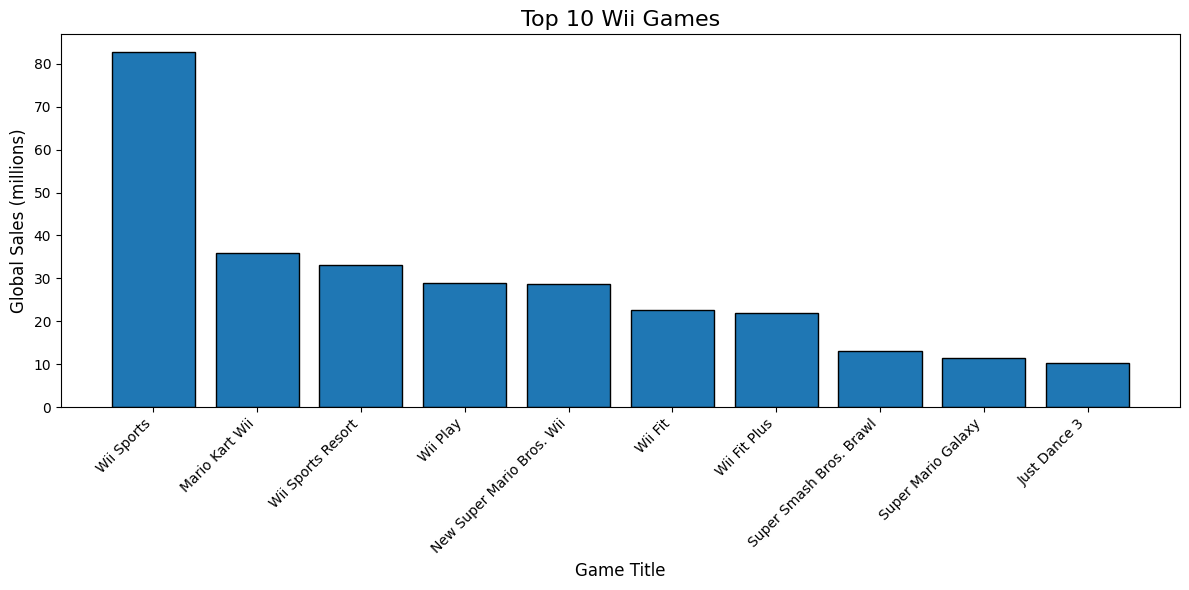

In [11]:
plt.figure(figsize=(12,6))
plt.bar(df4["name"], df4["global_sales"], edgecolor="black")

plt.title("Top 10 Wii Games", fontsize=16)
plt.xlabel("Game Title", fontsize=12)
plt.ylabel("Global Sales (millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("Top 10 Wii Games")
plt.show()

In [12]:
df5 = pd.read_sql_query("""
                        SELECT genre, AVG(global_sales) AS avg_global_sales
                        FROM game_sales
                        GROUP BY genre
                        ORDER BY avg_global_sales DESC;
    """, conn)
df5.style.hide(axis="index").set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

genre,avg_global_sales
Platform,0.947577
Shooter,0.800468
Role-Playing,0.628456
Racing,0.593273
Sports,0.568247
Fighting,0.531160
Action,0.529942
Misc,0.468488
Simulation,0.459882
Puzzle,0.424930


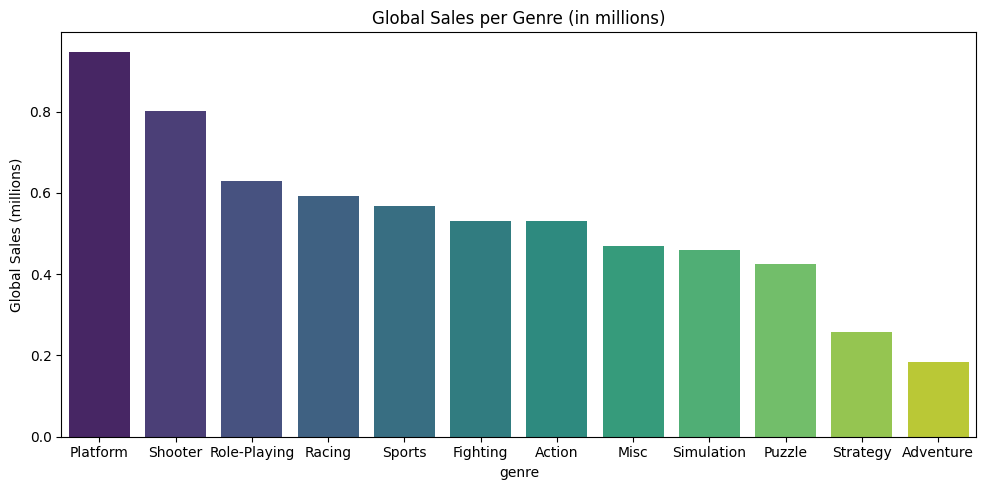

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre', y='avg_global_sales', data=df5, hue='genre', palette='viridis')
plt.title('Global Sales per Genre (in millions)')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.savefig("Global Sales per Genre.png")
plt.show()

In [14]:
df6 = pd.read_sql_query("""
                        SELECT name, year, global_sales
                        FROM game_sales
                        WHERE year < 2000 AND global_sales > 10;
    """, conn)
df6.style.hide(axis="index").set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

name,year,global_sales
Super Mario Bros.,1985,40.240000
Pokemon Red/Pokemon Blue,1996,31.370000
Tetris,1989,30.260000
Duck Hunt,1984,28.310000
Pokemon Gold/Pokemon Silver,1999,23.100000
Super Mario World,1990,20.610000
Super Mario Land,1989,18.140000
Super Mario Bros. 3,1988,17.280000
Pokémon Yellow: Special Pikachu Edition,1998,14.640000
Super Mario 64,1996,11.890000


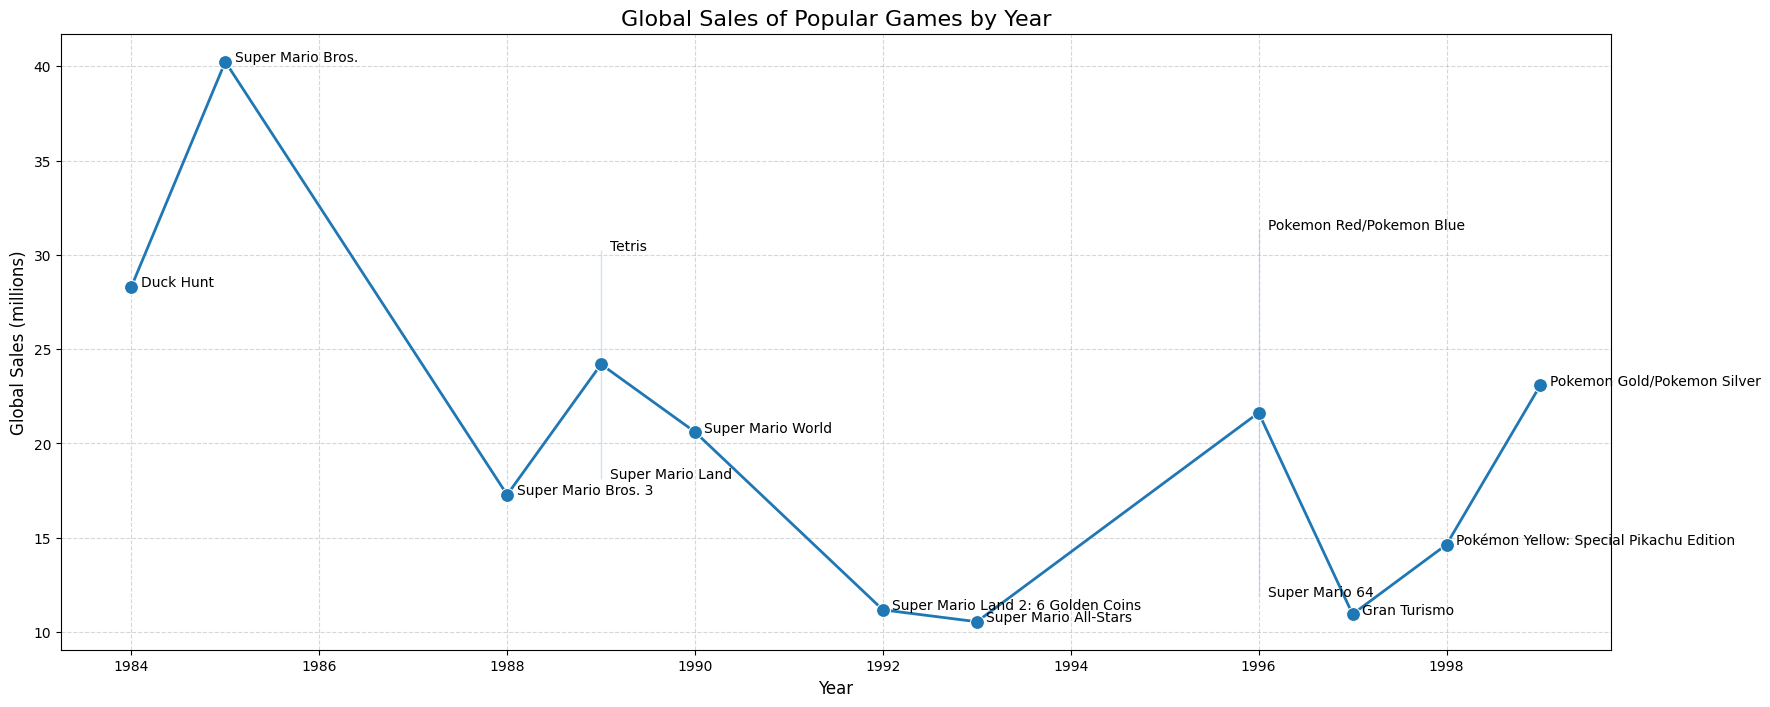

In [15]:
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=df6,
    x="year",
    y="global_sales",
   # hue="name",
    #palette='Set1',
    marker='o',
    markersize=10,
    linewidth=2
)
# Annotate each point with the game name
for i in range(len(df6)):
    plt.text(
        df6["year"][i]+0.1,
        df6["global_sales"][i],
        df6["name"][i],
        fontsize=10
    )
plt.title("Global Sales of Popular Games by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global Sales (millions)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("Global Sales of Popular Games by Year.png")
plt.show()